# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


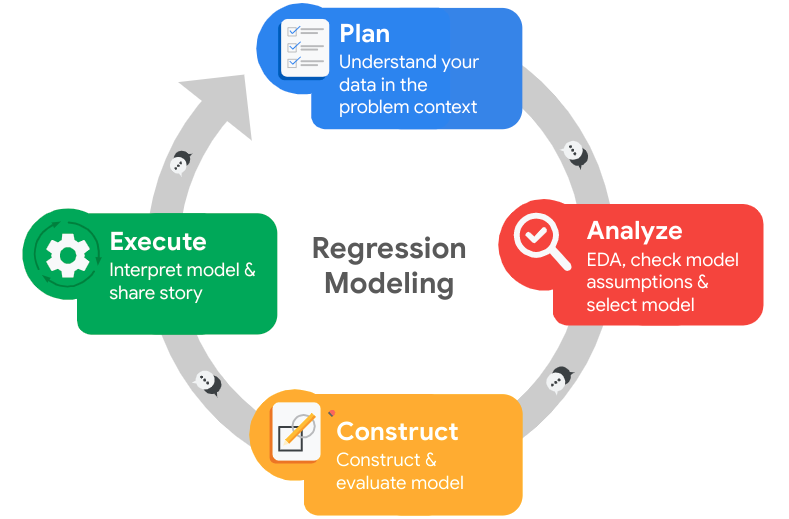

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Answers
* Stakeholders: Top management of Salifort, the IT team, members of the data analysis team.
* What to accomplish: Find out why an employee may leave and predict when they are about to leave
* Initial observation on data:
* Resources used: Python, pandas, matplotlib, seaborn, scipy stats
* Ethical considerations: 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning / Classification
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Data transformation and encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import boxcox

# Statistics
import scipy.stats as stats


# Visualization 
from matplotlib import pyplot as plt
import seaborn as sns


# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
seed = 42

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
HR_df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
HR_df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
HR_df0.info()
HR_df0['left'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


array([1, 0])

In [4]:
# Gather descriptive statistics about the data
display(HR_df0.describe())
display(HR_df0.describe(include=[object]))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Gather descriptive statistics about the data

In [5]:
# View the values of categorical variables
print('Departments:',HR_df0['Department'].unique())
print('salary:',HR_df0['salary'].unique())

Departments: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary: ['low' 'medium' 'high']


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
HR_df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
ColumnNames = ['satisfaction_level','last_evaluation','number_of_project','average_monthly_hours','time_spent_in_company',
 'work_accident','left','promotion_in_last_5years','department','salary']

HR_df0.columns = ColumnNames
HR_df0 = HR_df0[['satisfaction_level','last_evaluation','number_of_project','average_monthly_hours','time_spent_in_company',
 'work_accident','promotion_in_last_5years','department','salary','left']]

# Display all column names after the update
HR_df0.columns 

Index(['satisfaction_level', 'last_evaluation', 'number_of_project',
       'average_monthly_hours', 'time_spent_in_company', 'work_accident',
       'promotion_in_last_5years', 'department', 'salary', 'left'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### There is no missing values as noticed in basic information cell (HR_df0.info())


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
HR_df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
duplicateRows = HR_df0 [HR_df0.duplicated()]
duplicateRows = duplicateRows.sort_values(by=ColumnNames, ascending=True)
duplicateRows

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,work_accident,promotion_in_last_5years,department,salary,left
12030,0.09,0.62,6,294,4,0,0,accounting,low,1
14241,0.09,0.62,6,294,4,0,0,accounting,low,1
12071,0.09,0.77,5,275,4,0,0,product_mng,medium,1
14282,0.09,0.77,5,275,4,0,0,product_mng,medium,1
12652,0.09,0.77,6,290,4,0,0,technical,medium,1
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,IT,medium,0
12916,1.00,0.86,4,245,4,0,0,sales,medium,0
13089,1.00,0.88,6,201,4,0,0,technical,low,0
13586,1.00,0.93,5,167,3,0,0,sales,medium,0


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
HR_df0 = HR_df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
display(HR_df0)

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,work_accident,promotion_in_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high,0
11996,0.74,0.95,5,266,10,0,1,management,high,0
11997,0.85,0.54,3,185,10,0,1,management,high,0
11998,0.33,0.65,3,172,10,0,1,marketing,high,0


### Check outliers

Check for outliers in the data.

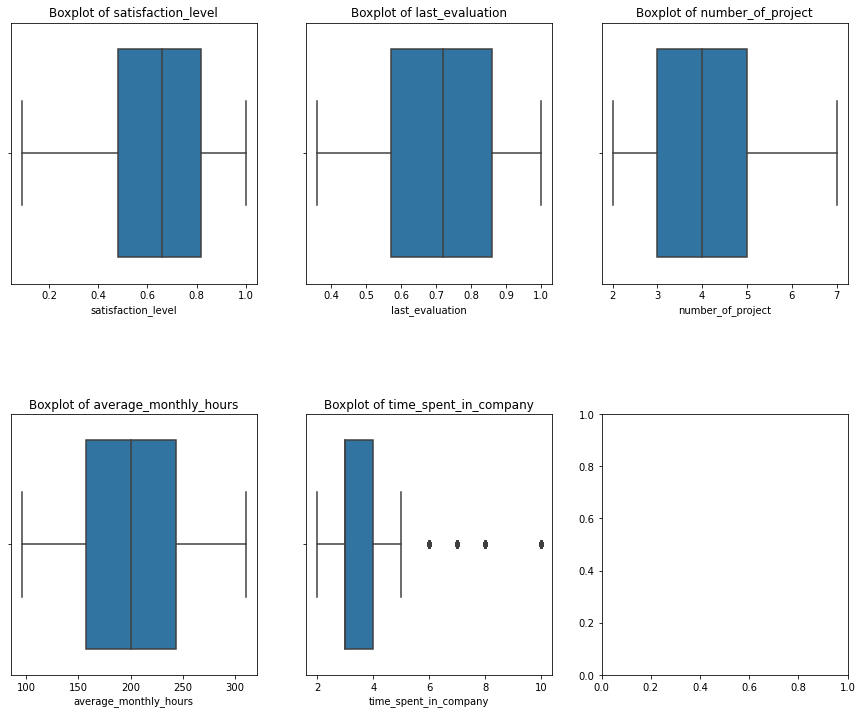

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# Create a 3x3 grid of subplots for boxplots

fig, axes = plt.subplots(2, 3, figsize=(15, 12)) 
fig.subplots_adjust(hspace=0.5)

# Create boxplots for each feature                                
for i, feature in enumerate(ColumnNames[:5]):
    sns.boxplot(x=HR_df0[feature], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}')

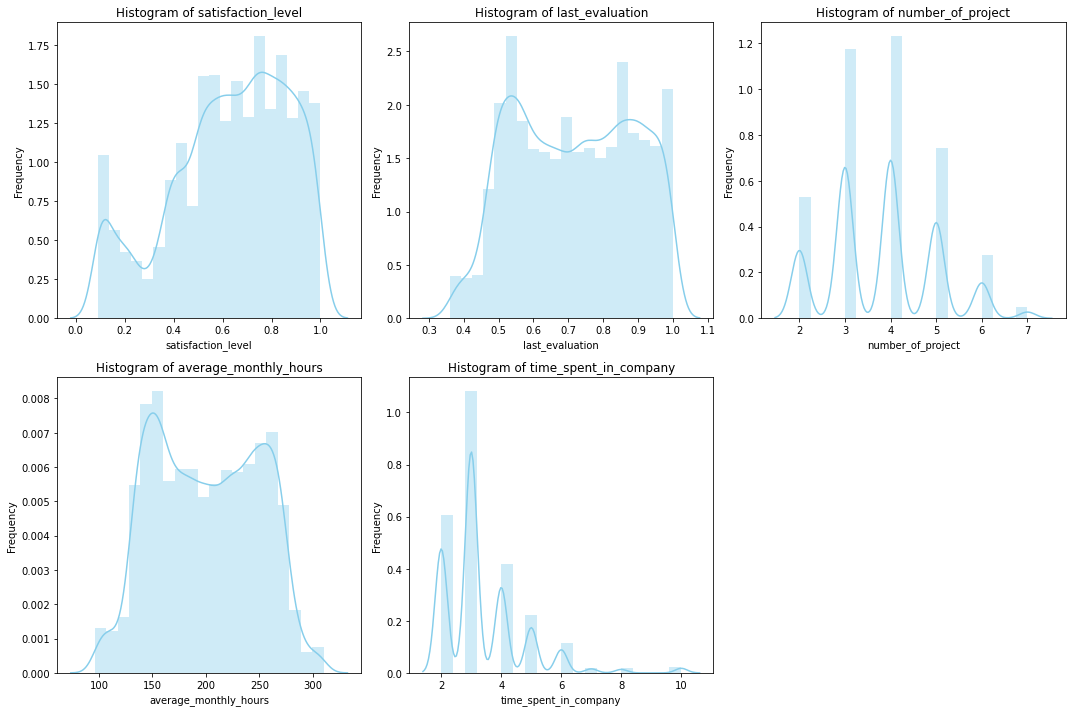

In [13]:
#Create a single figure for histograms
plt.figure(figsize=(15, 10))

# Create histograms for each feature
for i, feature in enumerate(ColumnNames[:5]):
    plt.subplot(2, 3, i + 1)
    sns.distplot(HR_df0[feature], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Determine the number of rows containing outliers
# Calculate the IQR of the column
Q1 = HR_df0['time_spent_in_company'].quantile(0.25)
Q3 = HR_df0['time_spent_in_company'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame that only includes the outliers
outliers_df = HR_df0[(HR_df0['time_spent_in_company'] < lower_bound) | (HR_df0['time_spent_in_company'] > upper_bound)]

# Print the number of rows in the outliers DataFrame
outliers_df


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,work_accident,promotion_in_last_5years,department,salary,left
1,0.80,0.86,5,262,6,0,0,sales,medium,1
17,0.78,0.99,4,255,6,0,0,sales,low,1
34,0.84,0.87,4,246,6,0,0,hr,low,1
47,0.57,0.70,3,273,6,0,0,support,low,1
67,0.90,0.98,4,264,6,0,0,product_mng,medium,1
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,1,management,high,0
11995,0.90,0.55,3,259,10,1,1,management,high,0
11996,0.74,0.95,5,266,10,0,1,management,high,0
11997,0.85,0.54,3,185,10,0,1,management,high,0


###### Notice:
The outliers are of contextual type meaning that they are not error and just represent employees who have stayed long the the company. These employees data can hold information on why they stayed which is valuable to in our case

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [22]:
# Get numbers of people who left vs. stayed
left_and_stayed = HR_df0['left'].value_counts().reset_index()
# Rename the columns
left_and_stayed.columns = ['Category', 'Count']
left_and_stayed.index = ['Stayed', 'Left']


# Get percentages of people who left vs. stayed
left_and_stayed['Percentage'] = 100*left_and_stayed['Count']/left_and_stayed['Count'].sum()
display(left_and_stayed)

,Category,Count,Percentage
Stayed,0,10000,83.39588
Left,1,1991,16.60412


###### Notice:
16.6% of the employees left

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

#### Plot  bar charts 1
Plot bar charts to show the number and precentage ofemplyees who leftby department and salary


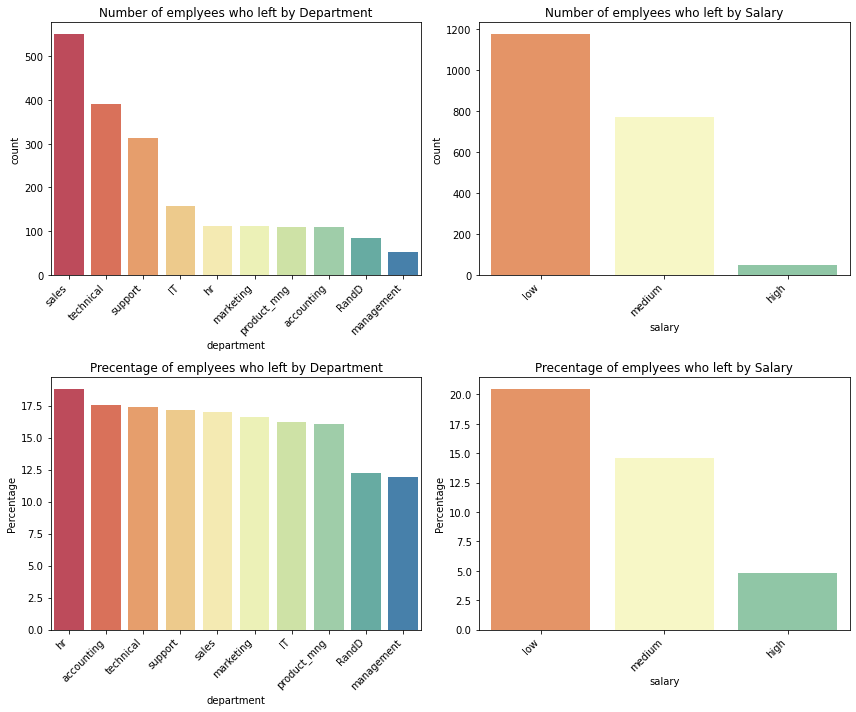

In [24]:
# Filter the DataFrame for employees who left (left=1)
left_df = HR_df0[HR_df0['left'] == 1]

Palette1 = 'Spectral' #'colorblind' #'Spectral'#'viridis'


# Calculate percentages of employees who left by department and salary
precentage_left_by_dept = (100*left_df['department'].value_counts()/HR_df0['department'].value_counts()).reset_index()
precentage_left_by_dept.columns = ['department', 'Percentage']
precentage_left_by_sal = (100*left_df['salary'].value_counts()/HR_df0['salary'].value_counts()).reset_index()
precentage_left_by_sal.columns = ['salary', 'Percentage']

# Create subplots for "left" by "department" and "salary" for employees who left
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sort the data by count in descending order for "left" by "department"
department_order = left_df['department'].value_counts().index

# Plot "left" by "department" for employees who left
sns.countplot(data=left_df, x='department', ax=axes[0,0], palette=Palette1, order=department_order)
axes[0,0].set_title('Number of emplyees who left by Department')

# Sort the data by count in descending order for "left" by "salary"
salary_order = left_df['salary'].value_counts().index

# Plot "left" by "salary" for employees who left
sns.countplot(data=left_df, x='salary', ax=axes[0,1], palette=Palette1, order=salary_order)
axes[0,1].set_title('Number of emplyees who left by Salary')


# Plot percentages
# Sort the DataFrame by 'Percentage' in descending order
precentage_left_by_dept = precentage_left_by_dept.sort_values(by='Percentage', ascending=False)

# Create a bar plot using Seaborn
sns.barplot(data=precentage_left_by_dept, x='department', y='Percentage', ax=axes[1,0], palette=Palette1)
axes[1,0].set_title('Precentage of emplyees who left by Department')

# Sort the DataFrame by 'Percentage' in descending order
precentage_left_by_sal = precentage_left_by_sal.sort_values(by='Percentage', ascending=False)

# Create a bar plot using Seaborn
sns.barplot(data=precentage_left_by_sal, x='salary', y='Percentage', ax=axes[1,1], palette=Palette1)
axes[1,1].set_title('Precentage of emplyees who left by Salary')


# Rotate x-axis tick labels to 45 degrees for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plots
plt.tight_layout()
plt.show()

#### Plot  bar chart 2
Plot  bar chart  of variables for employees who lest Vs those who stayed

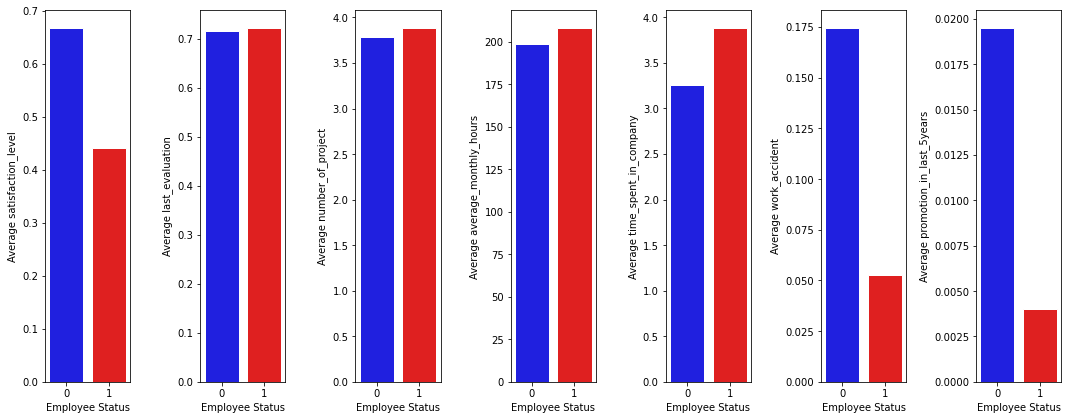

In [25]:
# Define the columns of interest
continuous_vars = ['satisfaction_level', 'last_evaluation', 'number_of_project', 'average_monthly_hours', 'time_spent_in_company',
                  'work_accident', 'promotion_in_last_5years']

# Create subplots for continuous variables
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_vars), figsize=(15, 6))

# Loop through continuous variables
for i, var in enumerate(continuous_vars):
    sns.set(style="whitegrid")
    
    # Group the data by 'left' and calculate the required statistics
    grouped = HR_df0.groupby('left')[var].agg(['mean']).reset_index()
    
    # Plot the pair bar chart for continuous variables
    sns.barplot(x='left', y='mean', data=grouped, palette=['blue', 'red'], ax=axes[i]) 
    
    # Set plot labels and title
    axes[i].set_xlabel('Employee Status')
    axes[i].set_ylabel('Average ' + var)
    #axes[i].set_title('Pair Bar Chart for ' + var)

# Show the plots
plt.tight_layout()
plt.show()

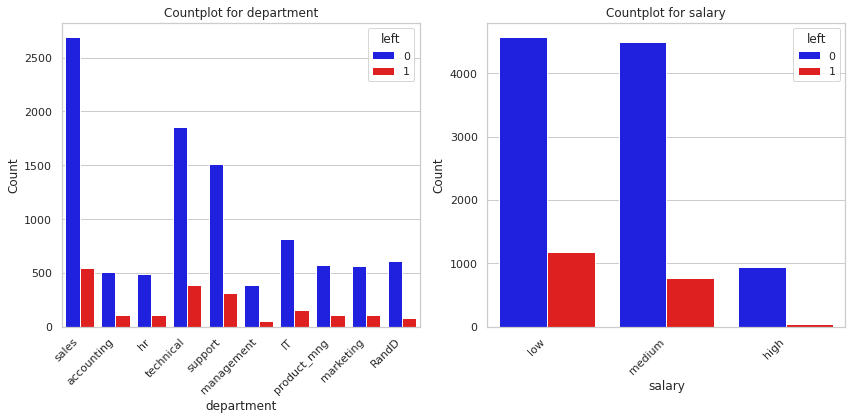

In [26]:
categorical_vars = ['department', 'salary']

# Create subplots for categorical variables
fig2, axes2 = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(12, 6))

# Loop through categorical variables
for i, var in enumerate(categorical_vars):
    sns.set(style="whitegrid")
    
    # Plot the countplot for categorical variables
    sns.countplot(x=var, hue='left', data=HR_df0, palette=['blue', 'red'], ax=axes2[i])
    # Rotate x-axis tick labels to 45 degrees
    axes2[i].set_xticklabels(axes2[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    
    # Set plot labels and title
    axes2[i].set_xlabel(var)
    axes2[i].set_ylabel('Count')
    axes2[i].set_title('Countplot for ' + var)

# Show the plots
plt.tight_layout()
plt.show()

#### Perform Hypothesis Tests
Perform hypothesis test to find out why employees leave


**Null Hypothesis (H0):** There is **No significant difference** in the means of the variables of employees left the company and employees that did not leave the company.

**Alternative Hypothesis (H1):** There is **a significant difference** in the means of the variables of employees left the company and employees that did not leave the company.

- For each variable, if the p-value is less than a chosen significance level **(0.05)**, we will reject the null hypothesis
- For each variable, if the p-value is greater than the chosen significance level **(0.05)**, we have failed to reject the null hypothesis



**Result summary, based on the t-test results:**

- Variables like "satisfaction_level," "number_of_project," "average_monthly_hours," and "time_spent_in_company" show statistically significant differences between employees who left and those who stayed.
- The "last_evaluation" variable does not show a statistically significant difference between the two groups.


**Result summary, based on the chi-square test and ANOVA results:**
- Variables like "work_accident", "promotion_in_last_5years" and "Salary" all show statistically significant differences between employees who left and those who stayed.

In [27]:
# T-Tests for Continuous Variables
continuous_vars = ['satisfaction_level', 'last_evaluation', 'number_of_project', 'average_monthly_hours', 'time_spent_in_company']

# Create an empty DataFrames to store the results
t_test_results = pd.DataFrame(columns=['Variable', 't_statistic', 'p_value'])

for var in continuous_vars:
    left_group = HR_df0[HR_df0['left'] == 1][var]
    not_left_group = HR_df0[HR_df0['left'] == 0][var]
    
    # run t-test on continuous_vars
    t_stat, p_value_t = stats.ttest_ind(left_group, not_left_group, equal_var=False)
    
    # Append the results to the DataFrame
    t_test_results = t_test_results.append({'Variable': var, 't_statistic': t_stat, 'p_value': p_value_t}, ignore_index=True)
display(t_test_results)
    
    
    
# Chi-Square Test for Categorical Variables
categorical_vars = ['work_accident', 'promotion_in_last_5years', 'department', 'salary']

# Create an empty DataFrames to store the results
chi2_test_results = pd.DataFrame(columns=['Variable', 'chi_squared', 'p_value'])

for var in categorical_vars:
    contingency_table = pd.crosstab(HR_df0['left'], HR_df0[var])
    chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)
    
     # Append the results to the DataFrame
    chi2_test_results = chi2_test_results.append({'Variable': var, 'chi_squared': chi2, 'p_value': p_value_chi2}, ignore_index=True)
display(chi2_test_results)



# ANOVA for Categorical Variables (e.g., Department)
categorical_var = 'department'
anova_groups = [HR_df0[HR_df0[categorical_var] == category]['left'] for category in HR_df0[categorical_var].unique()]
f_stat, p_value_anova = stats.f_oneway(*anova_groups)
# Create a DataFrame to store the results
anova_test_results = pd.DataFrame({'Variable': var, 'f_stat': [f_stat], 'p_value': [p_value_anova]})
display(anova_test_results)


,Variable,t_statistic,p_value
0,satisfaction_level,-35.889305,1.193954e-228
1,last_evaluation,1.298041,1.943907e-01
2,number_of_project,2.307798,2.110164e-02
3,average_monthly_hours,6.368797,2.267947e-10
4,time_spent_in_company,24.049801,5.787450e-119


,Variable,chi_squared,p_value
0,work_accident,187.737834,9.911243e-43
1,promotion_in_last_5years,22.992128,1.626662e-06
2,department,20.857513,1.329833e-02
3,salary,175.210719,8.984123e-39


,Variable,f_stat,p_value
0,salary,2.319604,0.013267


### Insights

### Results analysis based on the results of descriptive statistics (barcharts) and hypothesis testings

Based on the results, we can draw some conclusions about why employees leave or stay in the company:

**Satisfaction Level:** Employees who left the company had significantly lower satisfaction levels compared to those who stayed. This suggests that low job satisfaction is a strong indicator of employee turnover.

**Number of Projects:** Employees who left the company tended to be assigned to a different number of projects compared to those who stayed. This variable could indicate that being overburdened with too many might contribute to turnover.

**Average Monthly Hours:** Employees who left had significantly more average monthly working hours. While it's not clear whether more or fewer hours contributed to turnover, this variable might reflect work-life balance issues.

**Time Spent in Company:** Employees who left had significantly more time spent in the company compared to those who stayed. This could indicate that turnover is more common among old employees.

**Last Evaluation:** The last evaluation score didn't show a significant difference between employees who left and those who stayed. This suggests that the performance evaluation itself may not be a key factor in turnover.

**Work Accident:** There is a strong association between experiencing a work accident and the likelihood of employees staying.
Employees who have experienced a work accident may be more likely to stay at the company, possibly due to insurance policies, and inability to get a new job. It should be further investigated why those who experience an accident stay.

**Promotion in the Last 5 Years:** There is an association between receiving a promotion in the last 5 years and the likelihood of employees leaving. Employees who have not received a promotion in the last 5 years may be more inclined to leave, possibly due to a lack of career advancement opportunities or perceived stagnation.

**Department:** The department in which an employee works is associated with the likelihood of leaving. Certain departments may experience higher turnover rates than others (like 'sales', 'accounting', 'hr', 'technical'and 'support'), possibly due to varying job satisfaction levels, workload, or other department-specific factors.

**Salary:** There is a strong relationship between salary level and the likelihood of employees leaving. Employees with lower salaries are more likely to leave, which could be attributed to financial dissatisfaction, seeking better-paying opportunities, or perceived inequity in compensation.

It's important to note that these conclusions are based on statistical analysis of the provided data. To fully understand why employees leave, additional qualitative and contextual information, such as exit interviews, employee surveys, and company policies, would be valuable

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [28]:
# Label Encode department and salary

# Initialize LabelEncoders for 'department' and 'salary'
department_encoder = LabelEncoder()
salary_encoder = LabelEncoder()

# Fit and transform the 'department' and 'salary' columns
HR_df0['department'] = department_encoder.fit_transform(HR_df0['department'])
HR_df0['salary'] = salary_encoder.fit_transform(HR_df0['salary'])
display(HR_df0)

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,work_accident,promotion_in_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0,0
11996,0.74,0.95,5,266,10,0,1,4,0,0
11997,0.85,0.54,3,185,10,0,1,4,0,0
11998,0.33,0.65,3,172,10,0,1,5,0,0


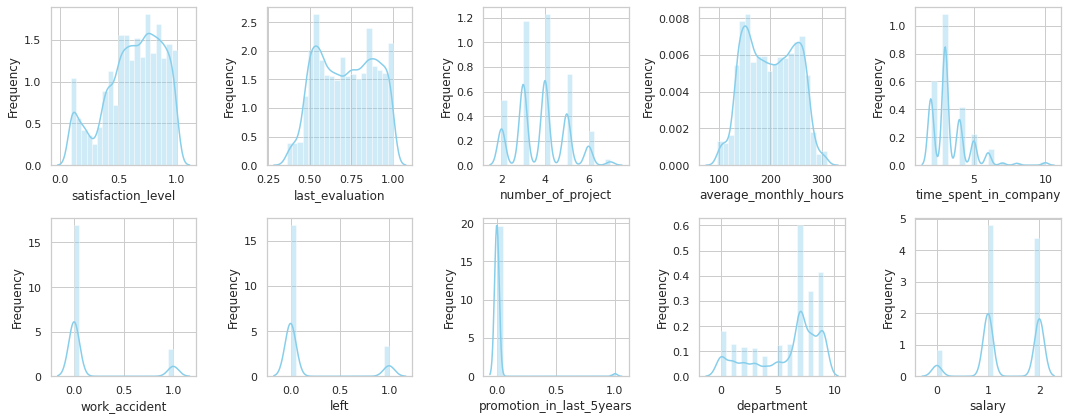

In [29]:
# Create histograms for each feature
# Set the figure size
plt.figure(figsize=(15, 6))

for i, feature in enumerate(ColumnNames):
    plt.subplot(2, 5, i + 1)
    sns.distplot(HR_df0[feature], bins=20, kde=True, color='skyblue')
    #plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

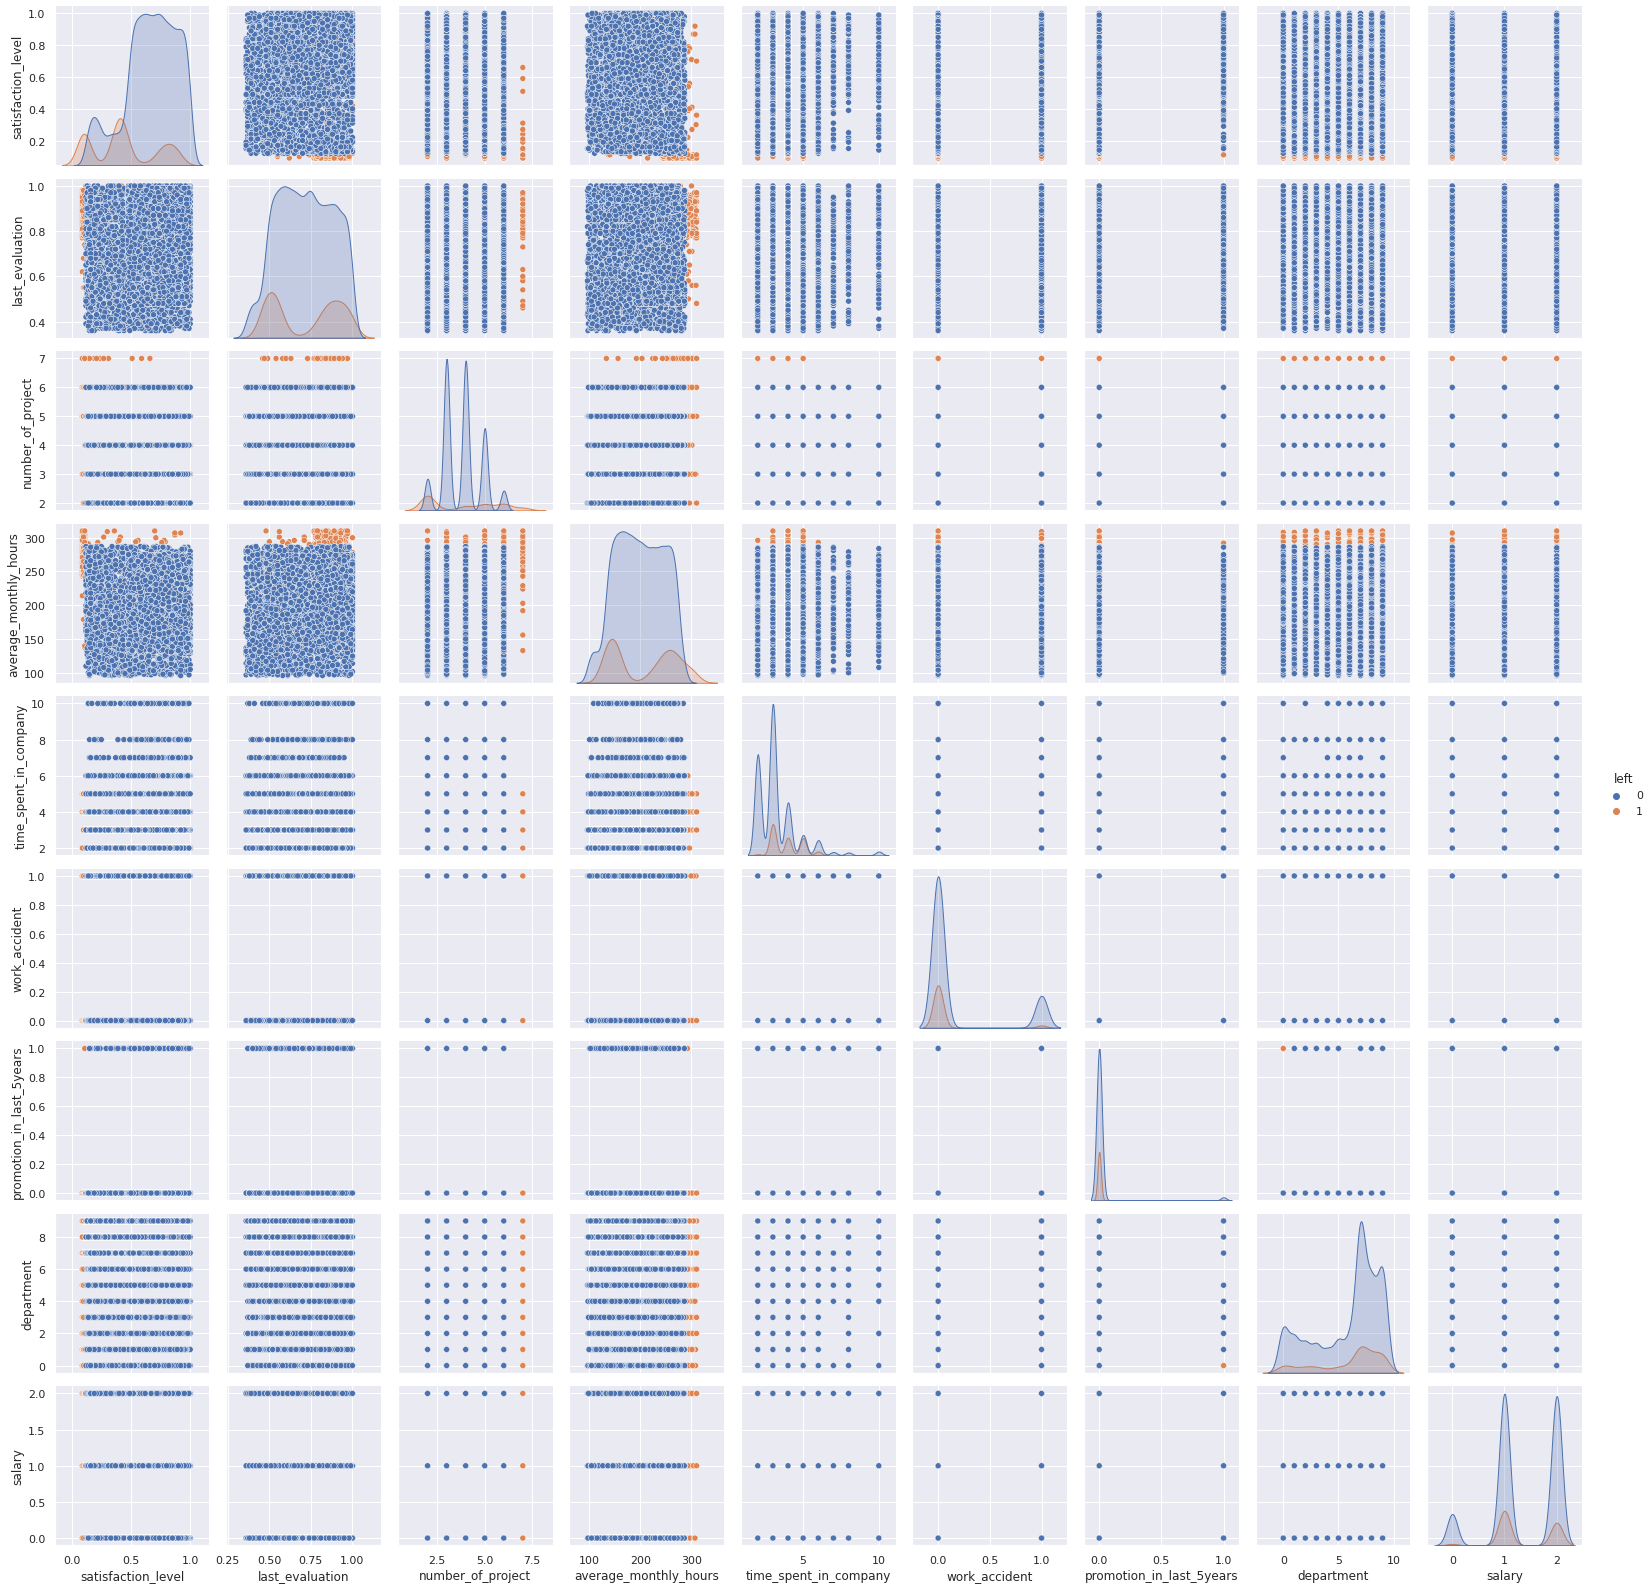

In [31]:
# plot scatterplot
#sns.set(style="darkgrid")
#sns.pairplot(HR_df0, hue="left")  # 'hue' is used to color points by the 'left' column
#plt.show()

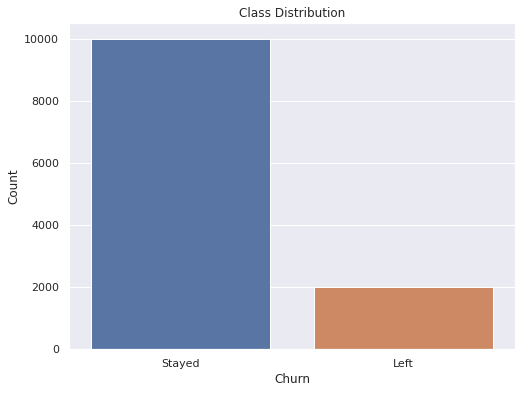

Class Counts:
0    10000
1     1991
Name: left, dtype: int64
Imbalance Ratio (Left/Stayed): 0.20


In [33]:
# Check for class imballance
# Count the number of samples in each class
class_counts = HR_df0['left'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=HR_df0['left'])
plt.title("Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["Stayed", "Left"])
plt.show()

# Print class counts and imbalance ratio
print("Class Counts:")
print(class_counts)
print(f"Imbalance Ratio (Left/Stayed): {imbalance_ratio:.2f}")

In [41]:
# Prepear data for machin learining
HR_df1 = HR_df0.drop(columns=['last_evaluation'])
X = HR_df1.drop(columns=['left'])  # Features (exclude the 'left' column)
y = HR_df1['left']  # Target variable ('left' column)

# Split the data into a training set (70%) and a test set (30%) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (9592, 8)
test size: (2399, 8)


In [44]:
# Use StratifiedKFold with GridSearchCV to find the best hyper-parameters for RandomForest
# Define the parameter grid to search
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2'],
    'class_weight': [None, 'balanced']
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a stratified k-fold cross-validator
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best Accuracy: 0.982172729648795


In [59]:
# Train model with stratified cross validation to take care of imbalanced in datasets

# Define the number of folds
k_folds = 10

# Initialize your classifier
classifier = RandomForestClassifier(class_weight=None, max_depth=10, max_features='log2',
            min_samples_leaf=1, min_samples_split=10, n_estimators=10, random_state=seed)

# Create a stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute accuracy scores
scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.4f} (± {std_accuracy:.4f})")


Fold 1: Accuracy = 0.9740
Fold 2: Accuracy = 0.9875
Fold 3: Accuracy = 0.9823
Fold 4: Accuracy = 0.9833
Fold 5: Accuracy = 0.9875
Fold 6: Accuracy = 0.9812
Fold 7: Accuracy = 0.9791
Fold 8: Accuracy = 0.9760
Fold 9: Accuracy = 0.9854
Fold 10: Accuracy = 0.9812
Mean Accuracy: 0.9818 (± 0.0043)


### Model Evaluation

In [61]:
# Initialize and train your classifier with all training data
classifier = RandomForestClassifier(class_weight=None, max_depth=10, max_features='log2',
            min_samples_leaf=1, min_samples_split=10, n_estimators=10, random_state=seed)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

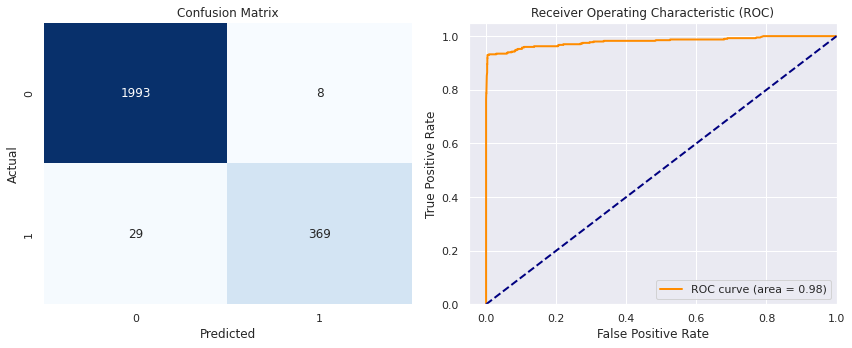

,Metric,Score
0,Accuracy,0.984577
1,Precision,0.978780
2,Recall,0.927136
3,F1 Score,0.952258
4,ROC AUC,0.979913


In [77]:
# Make predictions on the test set
#y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Set the desired threshold (e.g., 0.2)
threshold = 0.5

# Create binary predictions based on the threshold
y_pred = (y_proba >= threshold).astype(int)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Create a DataFrame to store the evaluation metrics
evaluation_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})


# Create subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc='lower right')

# Display the evaluation metrics DataFrame
plt.tight_layout()
plt.show()

# Display the evaluation metrics DataFrame
display(evaluation_df)

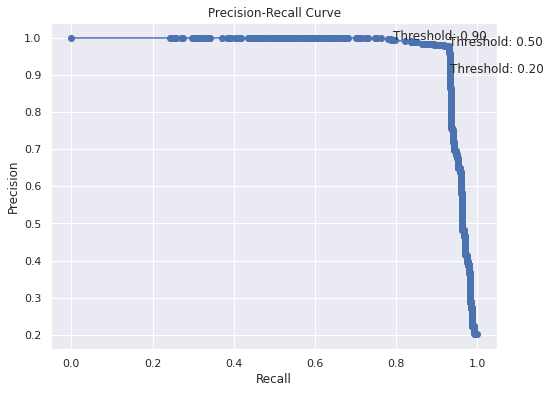

In [72]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Specify the thresholds you want to mark on the curve
selected_thresholds = [0.2, 0.5, 0.9]

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Annotate the selected thresholds on the curve
for threshold in selected_thresholds:
    closest_idx = (np.abs(thresholds - threshold)).argmin()
    plt.annotate(f'Threshold: {threshold:.2f}', (recall[closest_idx], precision[closest_idx]))

plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Introduction:

We built a predictive model to anticipate employee attrition, a critical concern for organizations.
This presentation outlines the model's performance metrics and discusses its potential impact on identifying employees likely to leave.

**Model Performance Metrics:**

**Accuracy: 98.46%**: This metric indicates the overall correctness of predictions.
A high accuracy rate suggests that the model is proficient at distinguishing between staying and leaving employees.

**Precision: 97.88%**: Precision represents the model's ability to correctly identify leaving employees among those predicted to leave. A high precision score indicates few false positives (incorrectly predicted departures).

**Recall: 92.71%**: Recall measures the model's capacity to capture actual departures among all employees who left.
A high recall score indicates fewer missed departures (lower false negatives).

**F1 Score: 95.23%**: The F1 score is the harmonic mean of precision and recall.
It provides a balanced assessment of model performance, favoring neither false positives nor false negatives.

**ROC AUC: 97.99%** The Receiver Operating Characteristic Area Under the Curve (ROC AUC) quantifies the model's ability to discriminate between positive and negative cases. A high ROC AUC score confirms the model's discriminative power.
Implications for Predicting Employee Attrition:

Our model exhibits outstanding performance across various metrics, promising significant benefits for the organization:

**High Accuracy:** Accurate predictions help HR teams focus their efforts and resources on the right employees.
Efficiently allocating resources for intervention, re-engagement, or retention strategies.
High Precision:

**Fewer false positives** prevent unnecessary intervention for employees who do not plan to leave.
Cost-saving by minimizing unneeded actions, such as excessive retention incentives.
High Recall:

**Fewer missed departures** result in higher retention rates.
Proactively retaining more employees, reducing recruitment and training costs.
Balanced F1 Score:

**The F1 score** balances precision and recall, making it a reliable measure for decision-making.
Ensures both accuracy and completeness in employee attrition predictions.
Strong ROC AUC:

**High ROC AUC** confirms the model's ability to classify employees correctly.
Enhanced decision-making support for HR professionals.
Conclusion:


### Conclusion, Recommendations, Next Steps


- Our predictive model demonstrates remarkable performance, offering substantial advantages for organizations in managing employee attrition.
- The combination of high accuracy, precision, recall, F1 score, and ROC AUC equips HR teams with a powerful tool for proactively identifying and retaining valuable talent.

- However, it's important to note that these conclusions are based on the provided data. To further increase perfomance additional information, such as exit interviews, employee surveys, and company policies, would be valuable.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.